In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [57]:
subset = data['2019-04-15':'2019-05-30'].mean(axis=1)

In [58]:
subset = subset.to_frame()

In [59]:
subset.columns = ['pm25']

In [60]:
subset['date'] = subset.index.date
subset['time'] = subset.index.time

In [61]:
reshaped = subset.pivot(columns='date', index='time')

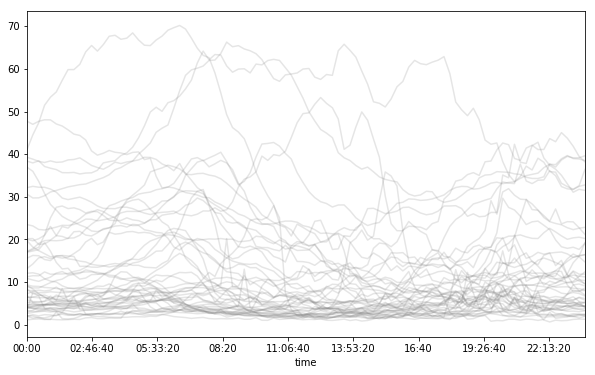

In [62]:
reshaped.plot(legend=False, color='gray', alpha=0.2, figsize=(10, 6))

In [63]:
bycol = reshaped

In [64]:
reshaped['time'] = reshaped.index

In [65]:
reshaped = reshaped.melt(id_vars=['time'])

In [66]:
reshaped['date'] = reshaped['date'].dt.strftime('%Y-%m-%d')

In [67]:
reshaped.head()

,time,None,date,value
0,00:00:00,pm25,2019-04-15,47.747222
1,00:15:00,pm25,2019-04-15,47.009630
2,00:30:00,pm25,2019-04-15,47.714630
3,00:45:00,pm25,2019-04-15,48.070648
4,01:00:00,pm25,2019-04-15,48.056019


In [84]:
bycol = bycol['pm25']

In [80]:
import pandas as pd
import numpy as np
from bokeh.palettes import Spectral11
from bokeh.plotting import figure, show, output_file
output_notebook()

toy_df = pd.DataFrame(data=np.random.rand(5,3), columns = ('a', 'b' ,'c'), index = pd.DatetimeIndex(start='01-01-2015',periods=5, freq='d'))   

numlines=len(toy_df.columns)
mypalette=Spectral11[0:numlines]

p = figure(width=500, height=300, x_axis_type="datetime") 
p.multi_line(xs=[toy_df.index.values]*numlines,
                ys=[toy_df[name].values for name in toy_df],
                line_color=mypalette,
                line_width=5)
show(p)

Loading BokehJS ...

/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.



In [75]:
toy_df

,a,b,c
2015-01-01,0.888415,0.431549,0.666618
2015-01-02,0.178847,0.023599,0.874388
2015-01-03,0.779536,0.494724,0.842061
2015-01-04,0.202065,0.016396,0.302148
2015-01-05,0.378677,0.384514,0.787567


In [104]:
output_file('graphs/interactive_plot.html')
p = figure(width=900, height=500, x_axis_type="datetime") 
p.multi_line(xs=[bycol.index.values]*len(bycol.columns),
                ys=[bycol[name].values for name in bycol],
                line_color='gray',
                line_width=2, alpha=0.2, hover_line_alpha=1.0)
p.add_tools(HoverTool(show_arrow=True,
                      line_policy='nearest', tooltips=[]
                      ))
p.yaxis.axis_label = 'PM2.5'
p.xaxis.axis_label = 'Time'
show(p)

### Doing the error bars across time for the 15min averaging

In [50]:
all_sites = data.mean(axis=1)

In [55]:
avg_15min = all_sites['2019-04-15':'2019-05-30'].groupby(all_sites['2019-04-15':'2019-05-30'].index.time).mean()
std_15min = all_sites['2019-04-15':'2019-05-30'].groupby(all_sites['2019-04-15':'2019-05-30'].index.time).std()


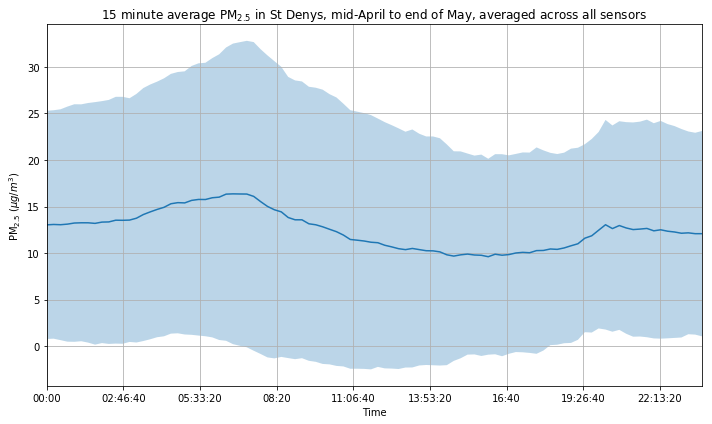

In [56]:
avg_15min.plot(figsize=(10, 6))
plt.fill_between(avg_15min.index, avg_15min - std_15min, avg_15min + std_15min, alpha=0.3)

plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
#plt.annotate("April", xy=(70, 35), xycoords='figure points')
plt.title('15 minute average $\mathrm{PM}_{2.5}$ in St Denys, mid-April to end of May, averaged across all sensors')
plt.tight_layout()
plt.savefig('graphs/15min_average_across_all_sensors.png', dpi=300)

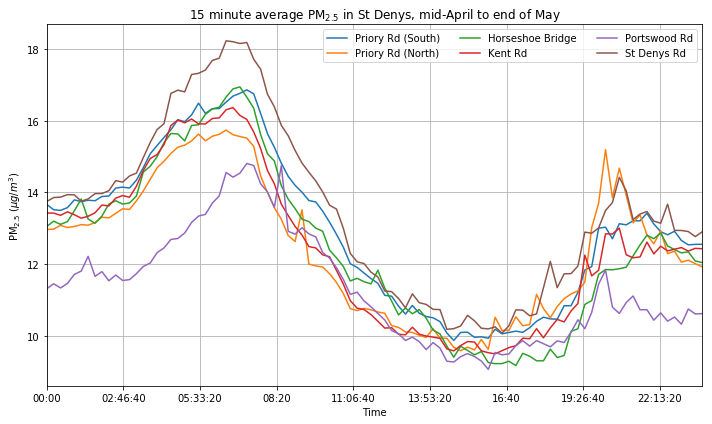

In [49]:
avg_15min.rename(columns=ID_to_name).plot(figsize=(10,6))
#plt.grid(axis='both', which='minor')
plt.grid(axis='both', which='major')
plt.legend(ncol=3)
plt.xlabel('Time')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
#plt.annotate("April", xy=(70, 35), xycoords='figure points')
plt.title('15 minute average $\mathrm{PM}_{2.5}$ in St Denys, mid-April to end of May')
plt.tight_layout()
plt.savefig('graphs/15min_average.png', dpi=300)